# Million Song Dataset

The Million Song Dataset (https://labrosa.ee.columbia.edu/millionsong/) is a freely-available
collection of audio features and metadata for a million contemporary popular music tracks.
It contains 50 features for each song in the dataset - artist name, album name, year of release,
danceability, tempo, beat, loudness, time, to name a few.
The entire dataset is over 250GB in size, however we will be working on a subset of the dataset
which is nearly 1.8 GB in size. However, our work can be scaled to the entire dataset.
The Million Song Dataset is by itself a collection of multiple datasets. In addition, we also use the
Yahoo! Music User Ratings Dataset (http://webscope.sandbox.yahoo.com/catalog.php?datatype=r )
to come up with much more interesting analysis.
We intend on analyzing the Million Song Dataset to:
1. Build machine learning models to predict the rating of a given song. We will explore the
problem with different approaches like regression and deep learning, and compare the
results obtained.
2. Build a Music Recommendation service using machine learning. We plan on building a
model that learns from the user’s previous music preference and recommend songs.
3. Visualize the features - the distribution of artists, their locations, song trends over time, etc.
4. Identify common trends in top performing songs and albums.
5. Build a web app that hosts our findings and interactive graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import Series
import seaborn as sns
import calendar
import datetime
import re
from itertools import cycle, islice
from IPython.display import display, HTML
import h5py
from pandas import HDFStore,DataFrame
import operator

% matplotlib inline

In [2]:
dataset = pd.read_csv('SongCSV.csv', encoding="utf-8")
dataset.head()

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,Duration,KeySignature,KeySignatureConfidence,Tempo,TimeSignature,TimeSignatureConfidence,Title,Year
0,1,b'SOMZWCG12A8C13C480',300848,b'Fear Itself',b'ARD7TVE1187B99BFB1',NaN,b'California - LA',NaN,b'Casual',0.0,218.93179,1,0.736,92.198,4,0.778,"bI Didn't Mean To""""",0
1,2,b'SOCIWDW12A8C13D406',300822,b'Dimensions',b'ARMJAGH1187FB546F3',35.14968,b'Memphis TN',-90.04892,b'The Box Tops',0.0,148.03546,6,0.169,121.274,4,0.384,b'Soul Deep',1969
2,3,b'SOXVLOJ12AB0189215',514953,b'Las Numero 1 De La Sonora Santanera',b'ARKRRTF1187B9984DA',NaN,b'',NaN,b'Sonora Santanera',0.0,177.47546,8,0.643,100.070,1,0.000,b'Amor De Cabaret',0
3,4,b'SONHOTT12A8C13493C',287650,b'Friend Or Foe',b'AR7G5I41187FB4CE6C',NaN,b'London England',NaN,b'Adam Ant',0.0,233.40363,0,0.751,119.293,4,0.000,b'Something Girls',1982
4,5,b'SOFSOCN12A8C143F5D',611336,b'Muertos Vivos',b'ARXR32B1187FB57099',NaN,b'',NaN,b'Gob',0.0,209.60608,2,0.092,129.738,4,0.562,b'Face the Ashes',2007


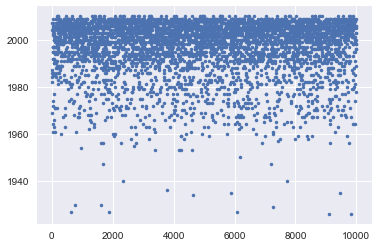

In [3]:
df =  dataset['Year']
non_zeros = df[df != 0]

plt.plot(non_zeros, '.')

### Song durations

/Users/sananth12/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


[]

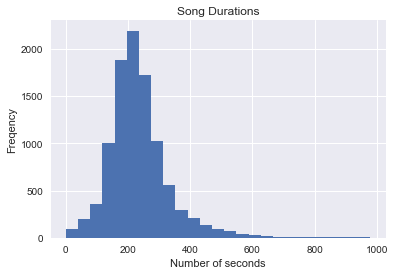

In [4]:
duration = dataset[['Duration']]
duration = duration.sort(['Duration'], ascending=True)
duration  = duration.values.ravel()
# duration[-25]
plt.hist(duration[:-25], bins=25)
plt.title("Song Durations")
plt.xlabel('Number of seconds')
plt.ylabel('Freqency')
plt.plot()

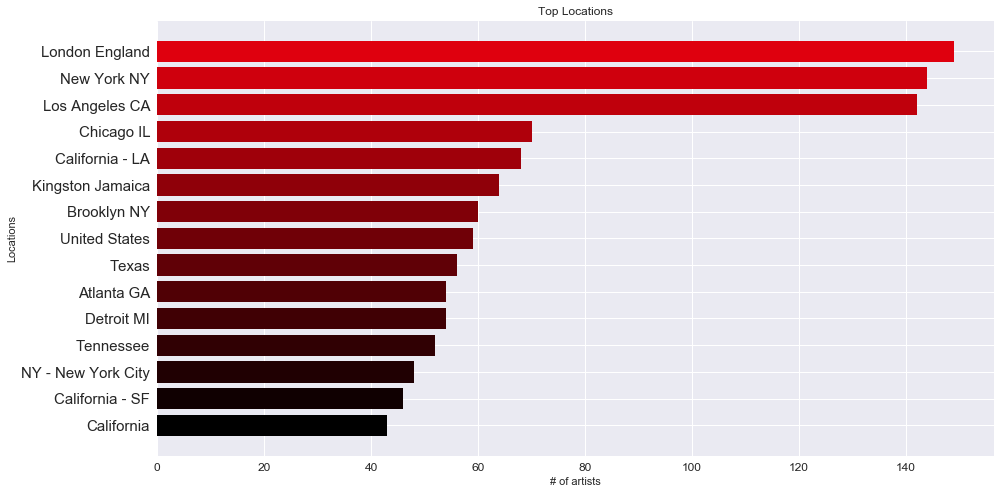

In [5]:
df2 = dataset['ArtistLocation']
locations = {}

for i in df2:
    if i != "b''":
        location = i[2:-1]
        if location in locations:
            locations[location] += 1
        else:
            locations[location] = 1

sorted_locations = sorted(locations.items(), key=operator.itemgetter(1))
sorted_locations.reverse()

handles = [x[0] for x in sorted_locations]
mention_count = [x[1] for x in sorted_locations]
handles = Series(handles).head(15)
mention_count = Series(mention_count).head(15)
indexes = [x for x in range(15)]

my_colors = [(x/16.0, 0.0, x/250.0) for x in range(len(indexes))]

plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=15) 
plt.title('Top Locations')
plt.barh(indexes, mention_count[::-1], align='center',
        color=my_colors)
plt.yticks(indexes, handles[::-1])
plt.xlabel('# of artists')
plt.ylabel('Locations')

plt.show()

In [6]:
df = pd.read_csv('./uci data/YearPredictionMSD.txt', encoding="utf-8")
df.shape

(515344, 91)

In [8]:
df.columns

Index(['2001', '49.94357', '21.47114', '73.07750', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.08960', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.72670', '1.36790', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.57980',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258',
       '41.55060', '-7.26272', '-21.00863', '105.50848', '64.29856',
       '26.08481', '-44.59110', '-8.30657', '7.93706', '-10.73660',
       '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626',
       '28.09139', '6.02015', '-37.13767', '-41.12450', 

In [18]:
df = dataset[["Tempo", "Year"]]
df = df = df[df.Year != 0]
# df.to_csv("tempo_year", sep=',')

df = df.groupby(['Year']).mean()
df.to_csv("avg_tempo_year", sep=',')
df

,Tempo
Year,
1926,101.002500
1927,131.065333
1929,114.177000
1930,133.322000
1934,100.795000
1935,87.740000
1936,38.443000
1940,101.541500
1947,113.624500


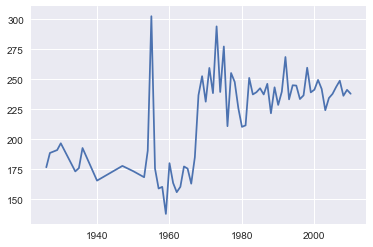

In [27]:
df = dataset[["Duration", "Year"]]
df = df = df[df.Year != 0]
# df.to_csv("tempo_year", sep=',')

df = df.groupby(['Year']).mean()

plt.plot(df["Duration"])
df.to_csv("avg_duration_year", sep=',')

In [54]:
df = dataset[["Year"]]
df = df[df.Year != 0]
y = df.values.ravel()

x = {}

for i in y:
    if i in x:
        x[i]+=1
    else:
        x[i] = 1

df = pd.DataFrame.from_dict(x, orient='index')
df.to_csv("song_year", sep=',')